In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA
import time
sns.set()

In [2]:
raw_data = pd.read_csv("Country-data.csv")
raw_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
print(raw_data.shape)
print(raw_data.info())

(167, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [4]:
raw_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
data = raw_data.drop(["country"] , axis = 1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
x = data.copy()

In [7]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
start = time.time()

kmeans = KMeans( n_clusters = 3)
kmeans.fit(x_scaled)

end = time.time()
print("Execution time:", end - start, "seconds")

Execution time: 0.09947037696838379 seconds


C:\Users\rasol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
data["cluster"] = kmeans.labels_
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [10]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

wcss

C:\Users\rasol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rasol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rasol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rasol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[117459687469.07817,
 36528387934.3221,
 24462384816.908222,
 14891567194.786396,
 11549506654.469957,
 7655725089.094505,
 5353767457.732321,
 4260514816.1154013,
 3692140569.032033,
 2641879145.435375,
 2357554561.451005,
 2076503865.3896327,
 1862594737.7178488,
 1561206532.7602043]

<function matplotlib.pyplot.show(close=None, block=None)>

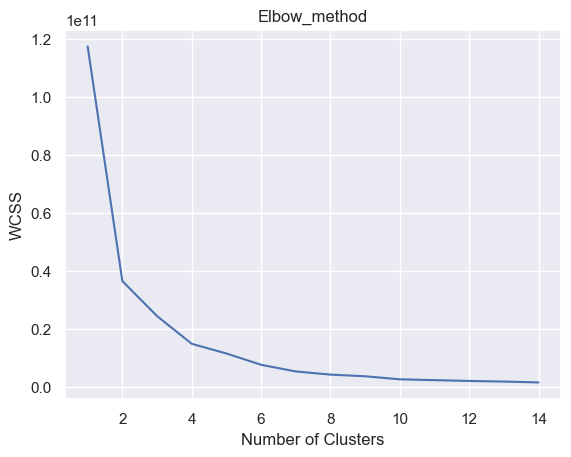

In [11]:
plt.plot(range(1,15) , wcss)
plt.title("Elbow_method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show

In [12]:
pca = PCA(n_components= 2)
x_pca = pca.fit_transform(x_scaled)

In [133]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                        columns=x.columns.values,
                        index=['Component 1','Component 2'])
df_pca_comp

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Component 1,-0.419519,0.283897,0.150838,0.161482,0.398441,-0.193173,0.425839,-0.403729,0.392645
Component 2,0.192884,0.613163,-0.243087,0.671821,0.022536,-0.008404,-0.222707,0.155233,-0.046022


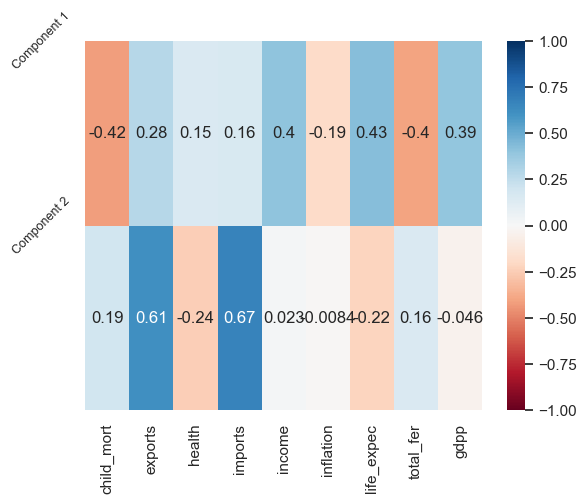

In [137]:
sns.heatmap(df_pca_comp,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)
plt.yticks([0,1],
          ['Component 1','Component 2'],
          rotation=45,
          fontsize=9)

plt.show()

In [13]:
start = time.time()

kmeans_pca = KMeans( n_clusters = 3)
kmeans_pca.fit(x_pca)

end = time.time()
print("Execution time:", end - start, "seconds")

Execution time: 0.0019974708557128906 seconds


C:\Users\rasol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
data["cluster_pca"] = kmeans_pca.labels_


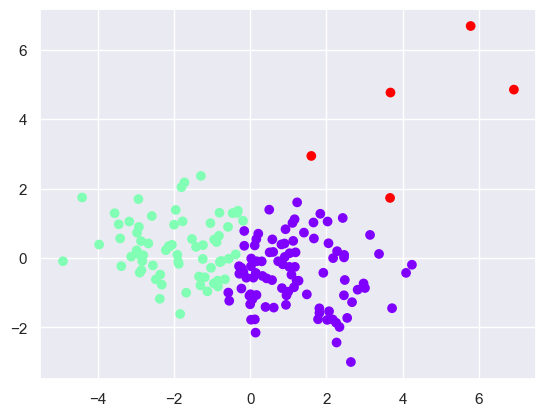

In [15]:
plt.scatter(x_pca[:, 0], x_pca[:, 1] , c = data["cluster_pca"] , cmap = "rainbow")
plt.show()

In [123]:
epsilon = 0.9
n_samples = 10
db = DBSCAN(eps = epsilon, min_samples = n_samples)
db.fit(x_pca)

DBSCAN(eps=0.9, min_samples=10)

In [125]:
data["cluster_DBSCAN"] = db.labels_

In [127]:
data["cluster_DBSCAN"].values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

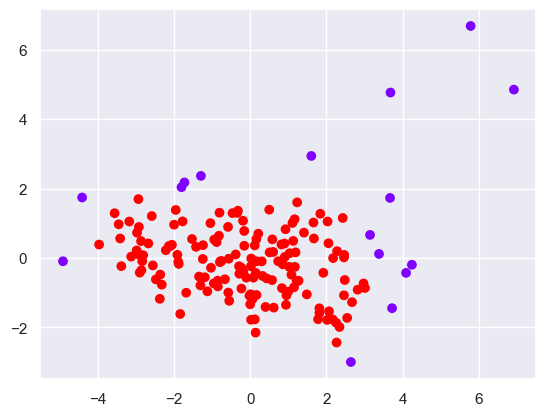

In [129]:
plt.scatter(x_pca[:, 0], x_pca[:, 1] , c = data["cluster_DBSCAN"] , cmap = "rainbow")
plt.show()